<div style="font-family: Arial,sans-serif; color: #3070b3; font-size: 13px; line-height: 14px; margin-top:25px;">
    <div style="float:right;">
        <a href="https://www.asg.ed.tum.de/en/lmf" title="Home">
            <img src="https://upload.wikimedia.org/wikipedia/commons/c/c8/Logo_of_the_Technical_University_of_Munich.svg" alt="Technical University of Munich" style="height: 42px">
        </a>
    </div>
    <div>
        <ul style="padding: 0pt; margin: 0pt; list-style-type: none;">
            <li> <a href="https://www.asg.ed.tum.de/en/lmf/" title="Home Chair of Remote Sensing Technology" style="text-decoration: none;">Chair of Remote Sensing Technology</a></li>
            <li> <a href="https://www.ed.tum.de/en/" title="Home TUM School of Engineering and Design" style="text-decoration: none;">TUM School of Engineering and Design</a></li>
            <li> <a href="https://www.tum.de/en/" title="Home Technical University of Munich" style="text-decoration: none;"> Technical University of Munich </a></li>
        </ul>
    </div>
</div>

<div style="font-family: Arial,sans-serif; font-size: 14px; line-height: 16px; margin-top:50px; display: flow-root">
    <div style="float:left;">
        <h1>Remote Sensing Sensors</h1>
        <p style="font-size:large">Summer Term 2024</p>
    </div>
    <div style="float:right;">
        <p>
        <span style="font-size:small">Prof. Dr. rer. nat. </span><br />
        <b>Michael Einder</b>
        </p>
        <p>
        <span style="font-size:small">Prof. Dr. rer. nat. habil.</span><br />
        <b>Marco Körner</b>
        </p>
        <p>
        <span style="font-size:small">Dr.-Ing.</span><br />
        <b>Giorgio Gomba</b>
        </p>
    </div>
    <p style="clear: both;"></p>
</div>

---

## 5. Delta Functions

The _Dirac delta function_ or _unit impulse function_ $\delta(t)$ is a mathematical abstraction which is often used to describe physical phenomena in appreciation of its handy properties, as described below. 

Mathematically correct, $\delta(t)$ is not a function but rather a _distribution_ entirely described by distribution properties
$$
\begin{align}
  \delta(0) &= 0 \quad \forall x \neq 0 \\
  \int_{-\infty}^{\infty} \delta(t) \,\mathrm{d}t &= 1 \qquad ,
\end{align}
$$
_i.e._, it is demanded to have unit area.

In [1]:
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
from matplotlib import colors

import seaborn as sns
import pandas as pd

from ipywidgets import interact, widgets

In [2]:
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # or 'png', 'retina', 'jpeg', 'pdf'

plt.rcParams.update({
    "text.usetex": True,
    "text.latex.preamble": r"\usepackage{amsmath,amsfonts,amssymb,mathtools,upgreek}",
    "font.family": "sans-serif",
    "font.sans-serif": 'Computer Modern roman',
    "font.size": 12,
    # "figure.figsize": (12,12),
})

From the defining properties mentioned above, the function representation of the Dirac delta function can be derived as
$$
\begin{align}
  \delta(t) &= 
  \begin{cases}
    0 & t \neq 0 \\
    1 & t = 0 \\
  \end{cases}
\end{align}
$$
or, more generically, as 
$$
\begin{align}
  \delta(t) =
  \lim_{\varepsilon \to 0}
  \delta_\varepsilon(t)&= 
  \lim_{\varepsilon \to 0}
  \begin{cases}
    0 & t < -\frac{\varepsilon}{2} \\
    \frac{1}{2} & -\frac{\varepsilon}{2} < t < \frac{\varepsilon}{2} \\
    1 & t > \frac{\varepsilon}{2} \\
  \end{cases} \\
  &= 
  \lim_{\varepsilon \to 0}
  \frac{1}{\varepsilon} \mathrm{rect} \left( \frac{1}{\varepsilon} t \right) \qquad .
\end{align}
$$

In [3]:
# rect = lambda x: np.where(abs(x) - .5 < 0, 1, 0) + np.where(abs(x)<=1e-5, 1, 0) * .5
rect = lambda x: (abs(x) - .5 < 0) * 1.
delta_e = lambda x, e: (1.0 / e) * rect(x/e)
delta= lambda x: np.where(abs(x)<1e-5, 1, 0)
step = lambda x: (x > 1e-5) * 1. + (np.abs(x) <= 1e-5) * .5

In [4]:
@interact(a = widgets.FloatSlider(min=1e-10, max=1, value=1, description=r'$\varepsilon$'))
def do(a = .5):
    _, axs = plt.subplots(1,2, figsize=(8,5))
    
    x = np.arange(-2,2,.01)

    axs[0].plot(x, delta_e(x,a), label=r'$\lim_{\varepsilon \to 0} \limits \frac{{1}}{{\varepsilon}} \cdot \text{{rect}}(t / \varepsilon)$')
    axs[1].plot(x, delta(x), label=r'$\delta(t)$')
    
    for ax in axs: 
        ax.set_xlabel('$t$')
        ax.legend()

interactive(children=(FloatSlider(value=1.0, description='$\\varepsilon$', max=1.0, min=1e-10), Output()), _do…

There are more choices of 'nascent' delta functions $\delta_\varepsilon$, _e.g._, the _Gaussian pulse_ function
$$
\begin{align}
  \delta(t) &= \lim_{\varepsilon \to 0} \frac{1}{\varepsilon} \exp\left( \frac{-\pi t^2}{\varepsilon^2} \right) \qquad,
\end{align}
$$
the $\text{sinc}$ function, the _Bessel function_ of order $\frac{1}{\varepsilon}$, or the _Airy disk function_.

## Further Properties of the Dirac Delta Function

### Sifting Property

For any function $u(t)$ that is continuous at $t_0$, the equality
$$
\begin{align}
  \int_{-\infty}^{\infty} u(t) \cdot \delta(t - t_0) \;\mathrm{d}t &= u(t_0)
\end{align}
$$
holds.
This _sifting property_ can be used to evaluate a function $u(t)$ at for any input $t_0$.

In [9]:
x = np.arange(-2,4,.01)

f = lambda x: -.02*x**3 + .15 * x**2 + -.25 * .05 * x + 0 + .5 * np.sin(3*x)

@interact(x_0 = widgets.FloatSlider(min=-2,max=4,step=.1,description=r'$t_0$'))
def do(x_0 = 1):
    _, axs = plt.subplots(4,1,sharex=True, figsize=(8,7))
    
    axs[0].plot(x,f(x),label=r'$u(t)$')
    
    axs[1].plot(x,delta(x-x_0),color='green',label=r'$\delta(t)$')
    
    axs[2].plot(x,f(x), alpha=.5)
    axs[2].plot(x,delta(x-x_0) * f(x),color='red',label=r'$\delta(t-t_0) \cdot u(t)$')
    
    axs[3].plot(x,f(x), alpha=.5)
    axs[3].plot(x,delta(x-x_0) * f(x_0),color='orange',label=r'$\delta(t-t_0) \cdot u(t_0)$')
    
    axs[1].set_ylim([-1.25,1.25])
    axs[-1].set_xlabel('$t$')
    for ax in axs: ax.legend()

interactive(children=(FloatSlider(value=0.0, description='$t_0$', max=4.0, min=-2.0), Output()), _dom_classes=…

### Periodic or Repeated Impulse Function

Replicating the Delta function periodically every $0 \leq \Delta T \in \mathbb{N}$ time steps results in the so-called _comb function_ 
$$
\begin{align}
    \text{comb}\left( \frac{t}{\Delta T} \right) &= \Delta T \sum_{n=-\infty}^{\infty} \delta(t - n\Delta T) \qquad .
\end{align}
$$

Multiplying such a comb function with the signal $u(t)$ produces (equidistant) discrete samples $u[t]$.

In [10]:
@interact(N = widgets.IntSlider(min=1, max=x.shape[0]//2, step=1, value=10, 
                                description=r'$N = \frac{T}{\Delta T}$'),
          random = widgets.ToggleButton(description='Random Samples'))
def do(N=10, random=True):
    _, axs = plt.subplots(3, 1, sharex=True, figsize=(8,7))
    
    y = f(x)
    axs[0].plot(x, y, label=r'$u(t)$')
    
    if random:
        choices = np.random.choice(range(0, x.shape[0]), N)
        comb = sp.signal.unit_impulse(x.shape, idx=list(choices))
    else:
        dT =  x.shape[0]//N
        comb = sp.signal.unit_impulse(x.shape, idx=range(0, x.shape[0])[::dT])
    
    axs[1].plot(x, comb, 
                color='green',
                label=r'$\text{comb}\left( \frac{t}{T} \right)$')
    
    y_sampled = comb * y
    y_sampled_idx = np.abs(y_sampled) > 0
    axs[2].plot(x, y, alpha=.5)
    axs[2].plot(x, comb*y, alpha=.5, 
                color='green')
    axs[2].scatter(x[y_sampled_idx], (y_sampled)[y_sampled_idx], 
                   color='orange',
                   label=r'$u[t] = \text{comb}\left( \frac{t}{T} \right) \cdot u(t)$')
    
    for ax in axs: ax.legend()
    
    axs[-1].set_xlabel(r'$t$')

interactive(children=(IntSlider(value=10, description='$N = \\frac{T}{\\Delta T}$', max=300, min=1), ToggleBut…

### Convolution Property

It's straightforward to see and handy to know that the convolution of any function $u(t)$ with the delta function $\delta(t-t_0)$ shifted by $t_0$ is equivalent to shifting the entire function $u$, _i.e._,
$$
\begin{align}
  u(t) \ast \delta(t-t_0) &= u(t-t_0) \qquad.
\end{align}
$$

In [7]:
@interact(x_0 = widgets.FloatSlider(min=-2,max=4,step=.1,description=r'$t_0$'))
def do(x_0 = 1):
    _, axs = plt.subplots(3,1,sharex=True, figsize=(8,5))
    
    y = f(x)
    axs[0].plot(x, y, label=r'$u(t)$')
    
    axs[1].plot(x,delta(x-x_0),color='red',label=r'$\delta(t)$')
    
    axs[2].plot(x,f(x), alpha=.25)
    axs[2].plot(x+1, sp.signal.convolve(delta(x-x_0), y, mode='same'),color='orange',label=r'$\delta(t-t_0) \ast u(t)$')
    
    axs[1].set_ylim([-1.25,1.25])
    axs[-1].set_xlabel('$t$')
    for ax in axs: ax.legend()

interactive(children=(FloatSlider(value=0.0, description='$t_0$', max=4.0, min=-2.0), Output()), _dom_classes=…

### Integral

The delta function is nicely realted to the _Heaviside step function_ $\gamma(t) = \begin{cases} 0 & t< 0 \\ \frac{1}{2} & t = 0 \\ 1 & t > 0 \end{cases}$:
$$
\begin{align}
  \delta(t) &=  \frac{\mathrm{d}}{\mathrm{d} t} \gamma(t) 
  &\Leftrightarrow &&
  \gamma(t) &= \int_{-\infty}^t \delta(t) \;\mathrm{d}t
\end{align}
$$

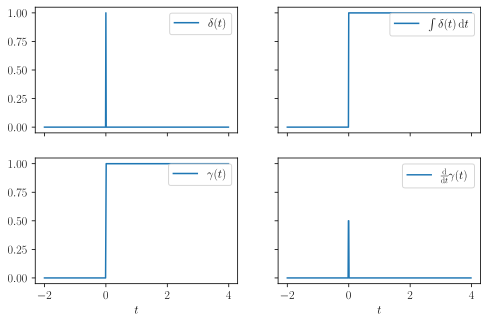

In [8]:
y = delta(x)

_, axs = plt.subplots(2,2, sharex=True, sharey=True, figsize=(8,5))
axs[0,0].plot(x,y, 
              label=r'$\delta(t)$')
axs[0,1].plot(x,np.cumsum(y), 
              label=r'$\int \delta(t) \,\mathrm{d}t$')
axs[1,0].plot(x,step(x), 
              label=r'$\gamma(t)$')
axs[1,1].plot(x[:-1],np.diff(step(x)), 
              label=r'$\frac{\mathrm{d}}{\mathrm{d}t} \gamma(t)$')

for ax in axs[1]: ax.set_xlabel('$t$')
for ax in axs.ravel(): ax.legend()